# Final Project 2

Nama            : Farah Alysa Putri <br>
Program         : Introduction to Python for Data Science <br>
Kode Peserta    : PYTN-KS02-001

Anggota Kelompok:
1. Anindita Khusnul Oktavia (PYTN-KS02-006)
2. Farah Alysa Putri        (PYTN-KS02-001)

## Perkenalan

Final Project 2 dibuat guna mengevaluasi konsep Logistic Regression dan SVM sebagai berikut:
- Mampu memahami konsep Classification dengan Logistic Regression dan SVM
- Mampu mempersiapkan data untuk digunakan dalam model Logistic Regression dan SVM
- Mampu mengimplementasikan Logistic Regression dan SVM untuk membuat prediksi <br>

Dataset yang digunakan adalah dataset Rain in Australia. Dataset ini memiliki 23 kolom dan 145460 baris yang diperoleh dari Kaggle pada link https://www.kaggle.com/jsphyg/weather-dataset-rattle-package. Dengan data hujan harian selama 10 tahun di Australia, kolom RainTomorrow adalah target variable yang akan diprediksi. Jika “Yes” maka besok harinya disana hujan 1mm atau lebih.

## Import Libraries

In [1]:
# import library
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

## Data Loading

In [2]:
# data loading
data = pd.read_csv('weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Dataset terdiri dari 23 atribut, antara lain:
1. Date - tanggal hari itu
2. Location - lokasi, nama kota di Australia
3. MinTemp - temperatur terendah hari itu dalam celcius
4. MaxTemp - temperatur tertinggi hari itu dalam celcius
5. Rainfall - jumlah curah hujan hari itu dalam mm
6. Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
7. Sunshine - jumlah jam hari itu cerah dengan cahaya matahari
8. WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum jam 12 malam hari itu
9. WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
10. WindDir9am - arah angin jam 9 pagi
11. WindDir3pm - arah angin jam 3 sore
12. WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
13. WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
14. Humidity9am - humiditas jam 9 pagi dalam persen
15. Humidity3pm - humiditas jam 3 sore dalam persen
16. Pressure9am - tekanan udara jam 9 pagi dalam hpa
17. Pressure3pm - tekanan udara jam 3 sore dalam hpa
18. Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
19. Cloud3pm - persentase langit yang tertutup awan jam 3 sore
20. Temp9am - temperatur jam 9 pagi dalam celcius
21. Temp3pm - temperatur jam 3 sore dalam celcius
22. RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
23. RainTomorrow - variable yang mau di prediksi

In [3]:
data.shape

(145460, 23)

Dataset terdiri dari 145460 baris dan 23 kolom

In [4]:
# cek type data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

## Data Cleaning

In [5]:
# data cleaning
data = data.drop(columns=['Evaporation','Sunshine','Cloud3pm','Cloud9am','Date','Location'],
                 axis=1)
data = data.dropna(how='any')
print(data.shape)

(112925, 17)


Dataset terdiri dari 112925 baris dan 17 kolom

In [6]:
data.head()

,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No


## Exploratory Data Analysis

<AxesSubplot:>

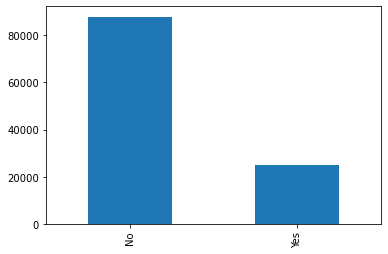

In [7]:
# variabel dependen
data['RainTomorrow'].value_counts().plot(kind='bar')

Berdasarkan bar chart, prediksi bahwa hari esok tidak terjadi hujan lebih banyak dibandingkan prediksi bahwa hari esok terjadi hujan.

<AxesSubplot:>

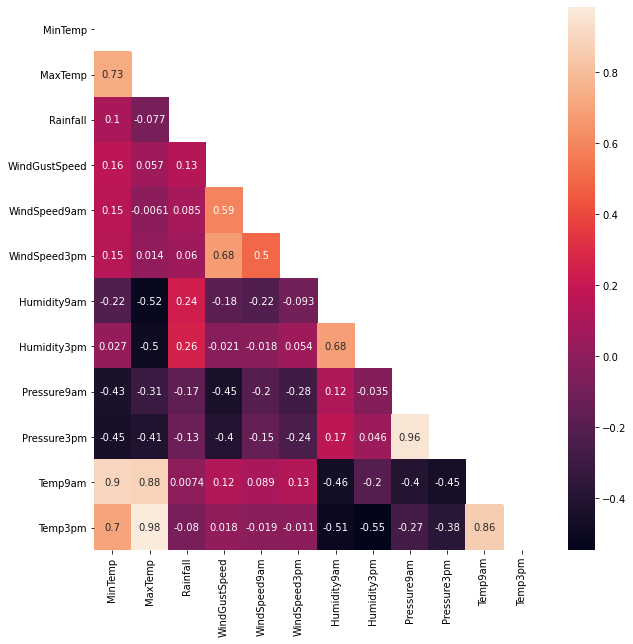

In [8]:
# plot heatmap untuk melihat korelasi antar variabel
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True, mask=np.triu(data.corr()))

Berdasarkan heatmap, terjadi korelasi positif yang kuat antara variabel MaxTemp & Temp3pm, antara variabel Pressure9am & Pressure 3pm, dan antara variabel MinTemp & Temp9an. Sedangkan korelasi negatif sedang terjadi antara variabel Humidity3pm & Temp3pm, antara variabel MaxTemp & Humidity9am, dan antara variabel Humidity9am & Temp3pm.

## Preprocessing

In [9]:
# mengganti No (0) dan Yes (1) pada kolom RainToday dan RainTomorrow
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

In [10]:
# categorical variables WindGustDir, WindDir3pm and WindDir9am pada dummy variables masing-masing kategori
categoric_c = ['WindGustDir', 'WindDir3pm', 'WindDir9am']
datafinal = pd.get_dummies(data, columns=categoric_c)
print(datafinal.shape)
datafinal.head()

(112925, 62)


,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,0,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,1,0,0,0,0,0,0,0,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,0,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,1,0,0,0,0,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,0,0,0


Dataset data final terdiri dari 112925 baris dan 62 kolom

In [11]:
# preprocessing MinMaxScaler
standa = preprocessing.MinMaxScaler()
standa.fit(datafinal)
datafinal = pd.DataFrame(standa.transform(datafinal), index=datafinal.index, columns=datafinal.columns)
datafinal.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW
0,0.513064,0.446154,0.001632,0.289062,0.211765,0.258824,0.71,0.22,0.449587,0.4800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.370546,0.494505,0.000000,0.289062,0.023529,0.235294,0.44,0.25,0.497521,0.4912,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.501188,0.507692,0.000000,0.304688,0.200000,0.282353,0.38,0.30,0.447934,0.5056,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.413302,0.558242,0.000000,0.132812,0.105882,0.082353,0.45,0.16,0.613223,0.5712,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.610451,0.652747,0.002720,0.265625,0.058824,0.211765,0.82,0.33,0.500826,0.4624,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# correlation matrix
corr = datafinal.corr()
corr1 = pd.DataFrame(abs(corr['RainTomorrow']),columns = ['RainTomorrow'])
nonvals = corr1.loc[corr1['RainTomorrow'] < 0.005]
print('Var correlation < 0.5%',nonvals)
nonvals = list(nonvals.index.values)

Var correlation < 0.5%                  RainTomorrow
WindGustDir_S        0.001759
WindGustDir_SSW      0.003007
WindDir3pm_SSW       0.003230
WindDir3pm_WSW       0.002857
WindDir9am_SW        0.004053


Karena variabel-variabel diatas memiliki nilai korelasi < 0.5%, maka variabel-variabel tersebut dapat dihapus. Sehingga dataset data final terdiri dari 112925 baris dan 57 kolom.

In [13]:
# mengahapus variables dengan correlation < 0.5%
datafinal1 = datafinal.drop(columns=nonvals,axis=1)
print('Data Final',datafinal1.shape)

Data Final (112925, 57)


In [14]:
# split data train dan test
Y = datafinal1['RainTomorrow']
X = datafinal1.drop(columns=['RainTomorrow'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [15]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (90340, 56)
Y train shape:  (90340,)
X test shape:  (22585, 56)
Y test shape:  (22585,)


## Modelling

### Logistic Regression

In [16]:
# logistic regression
# mendefinisikan model
logreg = LogisticRegression(C=10)

# training model
logreg.fit(X_train, Y_train)

# predict target values
Y_predict1 = logreg.predict(X_test)

C:\Users\Farah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


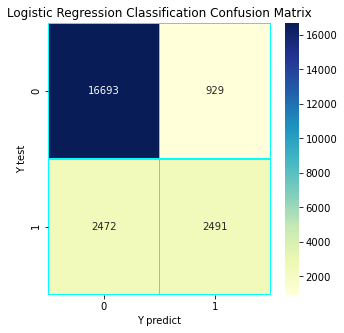

In [17]:
# confusion matrix
logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Berdasarkan Logistic Regression Confusion Matrix, diperoleh hasil sebagai berikut:
1. “True Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0) dan sesuai dengan data aktual bahwa esok hari tidak terjadi hujan (0) sebanyak 16693.
2. “False Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0), namun pada data aktual menunjukkan bahwa esok hari terjadi hujan (1) sebanyak 929.
3. “False Negative” - Frekuensi prediksi bahwa esok hari terjadi hujan (1), namun pada data aktual menunjukkan bahwa esok hari tidak terjadi hujan (0) sebanyak 2472.
4. "True Positive" - Frekuensi prediksi bahwa esok hari terjadi hujan (1) dan sesuai dengan data aktual bahwa esok hari terjadi hujan (1) sebanyak 2491.

In [18]:
# test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

0.84941332742971


In [19]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict1))
print(classification_report(Y_test, Y_predict1))

Accuracy Score: 0.84941332742971
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91     17622
         1.0       0.73      0.50      0.59      4963

    accuracy                           0.85     22585
   macro avg       0.80      0.72      0.75     22585
weighted avg       0.84      0.85      0.84     22585



### K-Nearest Neighbors

In [20]:
# K-Nearest Neighbors 
# mendefinisikan model
knncla = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)

# training model
knncla.fit(X_train, Y_train)

# predict target values
Y_predict2 = knncla.predict(X_test)

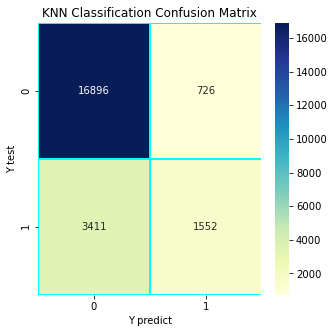

In [21]:
# confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Berdasarkan KNN Confusion Matrix, diperoleh hasil sebagai berikut:
1. “True Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0) dan sesuai dengan data aktual bahwa esok hari tidak terjadi hujan (0) sebanyak 16896.
2. “False Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0), namun pada data aktual menunjukkan bahwa esok hari terjadi hujan (1) sebanyak 726.
3. “False Negative” - Frekuensi prediksi bahwa esok hari terjadi hujan (1), namun pada data aktual menunjukkan bahwa esok hari tidak terjadi hujan (0) sebanyak 3411.
4. "True Positive" - Frekuensi prediksi bahwa esok hari terjadi hujan (1) dan sesuai dengan data aktual bahwa esok hari terjadi hujan (1) sebanyak 1552.

In [22]:
# test score
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.8168253265441665


In [23]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict2))
print(classification_report(Y_test, Y_predict2))

Accuracy Score: 0.8168253265441665
              precision    recall  f1-score   support

         0.0       0.83      0.96      0.89     17622
         1.0       0.68      0.31      0.43      4963

    accuracy                           0.82     22585
   macro avg       0.76      0.64      0.66     22585
weighted avg       0.80      0.82      0.79     22585



### Support Vector Machine

In [24]:
# mendefinisikan SVM model
svm = SVC()

# training model
svm.fit(X_train, Y_train)

# predict target values
Y_predict3 = svm.predict(X_test)

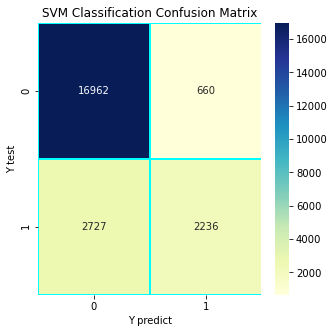

In [25]:
# confusion matrix
svmcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Berdasarkan SVM Confusion Matrix, diperoleh hasil sebagai berikut:
1. “True Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0) dan sesuai dengan data aktual bahwa esok hari tidak terjadi hujan (0) sebanyak 16962.
2. “False Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0), namun pada data aktual menunjukkan bahwa esok hari terjadi hujan (1) sebanyak 660.
3. “False Negative” - Frekuensi prediksi bahwa esok hari terjadi hujan (1), namun pada data aktual menunjukkan bahwa esok hari tidak terjadi hujan (0) sebanyak 2727.
4. "True Positive" - Frekuensi prediksi bahwa esok hari terjadi hujan (1) dan sesuai dengan data aktual bahwa esok hari terjadi hujan (1) sebanyak 2236.

In [26]:
# test score
score_svmcla = svm.score(X_test, Y_test)
print(score_svmcla)

0.8500332078813372


In [27]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict3))
print(classification_report(Y_test, Y_predict3))

Accuracy Score: 0.8500332078813372
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91     17622
         1.0       0.77      0.45      0.57      4963

    accuracy                           0.85     22585
   macro avg       0.82      0.71      0.74     22585
weighted avg       0.84      0.85      0.83     22585



### Decision Tree

In [28]:
# decision tree
# mendefinisikan model
dtcla = DecisionTreeClassifier(random_state=9)

# training model
dtcla.fit(X_train, Y_train)

# predict target values
Y_predict4 = dtcla.predict(X_test)

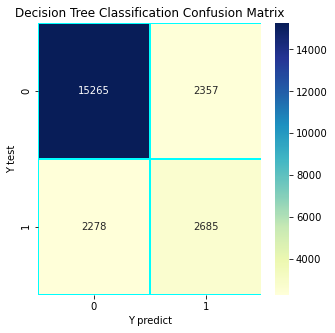

In [29]:
# confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Berdasarkan Decision Tree Confusion Matrix, diperoleh hasil sebagai berikut:
1. “True Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0) dan sesuai dengan data aktual bahwa esok hari tidak terjadi hujan (0) sebanyak 15265.
2. “False Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0), namun pada data aktual menunjukkan bahwa esok hari terjadi hujan (1) sebanyak 2357.
3. “False Negative” - Frekuensi prediksi bahwa esok hari terjadi hujan (1), namun pada data aktual menunjukkan bahwa esok hari tidak terjadi hujan (0) sebanyak 2278.
4. "True Positive" - Frekuensi prediksi bahwa esok hari terjadi hujan (1) dan sesuai dengan data aktual bahwa esok hari terjadi hujan (1) sebanyak 2685.

In [30]:
# test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

0.7947752933362852


In [31]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict4))
print(classification_report(Y_test, Y_predict4))

Accuracy Score: 0.7947752933362852
              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87     17622
         1.0       0.53      0.54      0.54      4963

    accuracy                           0.79     22585
   macro avg       0.70      0.70      0.70     22585
weighted avg       0.80      0.79      0.80     22585



### Random Forest

In [32]:
# random forest
# mendefinisikan model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# training model
rfcla.fit(X_train, Y_train)

# predict target values
Y_predict5 = rfcla.predict(X_test)

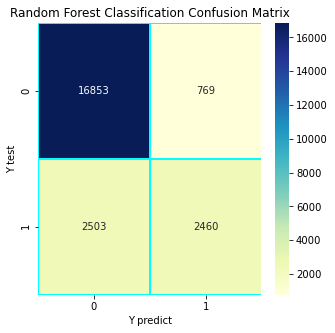

In [33]:
# confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Berdasarkan Random Forest Confusion Matrix, diperoleh hasil sebagai berikut:
1. “True Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0) dan sesuai dengan data aktual bahwa esok hari tidak terjadi hujan (0) sebanyak 16853.
2. “False Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0), namun pada data aktual menunjukkan bahwa esok hari terjadi hujan (1) sebanyak 769.
3. “False Negative” - Frekuensi prediksi bahwa esok hari terjadi hujan (1), namun pada data aktual menunjukkan bahwa esok hari tidak terjadi hujan (0) sebanyak 2503.
4. "True Positive" - Frekuensi prediksi bahwa esok hari terjadi hujan (1) dan sesuai dengan data aktual bahwa esok hari terjadi hujan (1) sebanyak 2460.

In [34]:
# test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

0.8551250830197034


In [35]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict5))
print(classification_report(Y_test, Y_predict5))

Accuracy Score: 0.8551250830197034
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.91     17622
         1.0       0.76      0.50      0.60      4963

    accuracy                           0.86     22585
   macro avg       0.82      0.73      0.76     22585
weighted avg       0.85      0.86      0.84     22585



### Naive Bayes

In [36]:
# naive bayes
# mendefinisikan model
nbcla = GaussianNB()

# training model
nbcla.fit(X_train, Y_train)

# predict target values
Y_predict6 = nbcla.predict(X_test)

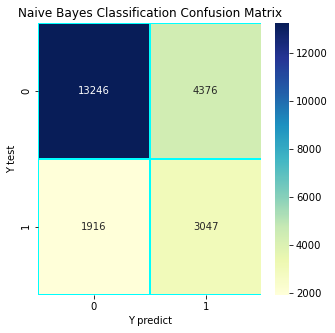

In [37]:
# confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

Berdasarkan Naive Bayes Confusion Matrix, diperoleh hasil sebagai berikut:
1. “True Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0) dan sesuai dengan data aktual bahwa esok hari tidak terjadi hujan (0) sebanyak 13246.
2. “False Positive” - Frekuensi prediksi bahwa esok hari tidak terjadi hujan (0), namun pada data aktual menunjukkan bahwa esok hari terjadi hujan (1) sebanyak 4376.
3. “False Negative” - Frekuensi prediksi bahwa esok hari terjadi hujan (1), namun pada data aktual menunjukkan bahwa esok hari tidak terjadi hujan (0) sebanyak 1916.
4. "True Positive" - Frekuensi prediksi bahwa esok hari terjadi hujan (1) dan sesuai dengan data aktual bahwa esok hari terjadi hujan (1) sebanyak 3047.

In [38]:
# test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

0.721408014168696


In [39]:
print("Accuracy Score:", accuracy_score(Y_test, Y_predict6))
print(classification_report(Y_test, Y_predict6))

Accuracy Score: 0.721408014168696
              precision    recall  f1-score   support

         0.0       0.87      0.75      0.81     17622
         1.0       0.41      0.61      0.49      4963

    accuracy                           0.72     22585
   macro avg       0.64      0.68      0.65     22585
weighted avg       0.77      0.72      0.74     22585



## Evaluasi Model

In [40]:
# membandingkan model
model_ev = pd.DataFrame({'Model': ['Logistic Regression Score', 
                        'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 
                         'Random Forest Score', 'K-Nearest Neighbour Score'], 'Accuracy': [score_logreg, score_svmcla, score_nbcla, score_dtcla, 
                         score_rfcla, score_knncla]})
model_ev

Accuracy_score = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, 
                         score_rfcla, score_knncla], index=['Logistic Regression Score', 
                        'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 
                         'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Accuracy_score)

Logistic Regression Score       0.849413
Support Vector Machine Score    0.850033
Naive Bayes Score               0.721408
Decision Tree Score             0.794775
Random Forest Score             0.855125
K-Nearest Neighbour Score       0.816825
dtype: float64


## Kesimpulan

1. Berdasarkan bar chart, prediksi bahwa hari esok tidak terjadi hujan lebih banyak dibandingkan prediksi bahwa hari esok terjadi hujan.
2. Berdasarkan heatmap, terjadi korelasi positif yang kuat antara variabel MaxTemp & Temp3pm, antara variabel Pressure9am & Pressure 3pm, dan antara variabel MinTemp & Temp9an. Sedangkan korelasi negatif terkuat terjadi antara variabel Humidity3pm & Temp3pm, antara variabel MaxTemp & Humidity9am, dan antara variabel Humidity9am & Temp3pm.
3. Pada project ini digunakan 6 algoritma model machine learning yang terdiri dari Logistic Regression, Support Vector Machine, Naive Bayes, Decision Tree Score, Random Forest, dan K-Nearest Neighbour.
4. Berdasarkan perbandingan nilai akurasi dari 6 algoritma model machine learning, model dengan nilai akurasi tertinggi adalah model Random Forest dengan nilai akurasi sebesar 0.855125. Sehingga algoritma yang paling sesuai untuk digunakan adalah Random Forest.